In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from date_of_death import predicted_year_of_death as pyod, predicted_day_of_death as pdod, __cdnp as curve

In [3]:
number = 32
max_year = 100

results = np.zeros((number, 2), dtype=np.int32)
for i in range(number):
    age = np.random.randint(max_year+1)
    yod = pyod(age, max_year)
    # print(f"Age: {age:3}, Year of Death: {yod:3}")
    results[i, 0] = age
    results[i, 1] = yod

df = pd.DataFrame()
df["age"] = results[:, 0]
df["yod"] = results[:, 1]
df.head(number)

,age,yod
0,83,92
1,0,76
2,80,92
3,26,88
4,72,87
5,47,78
6,77,90
7,44,87
8,25,43
9,96,100


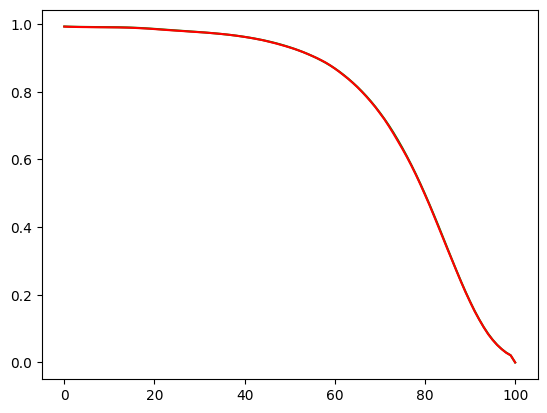

In [4]:
deaths = np.zeros(101, dtype=np.int32)
count = 100_000
for i in range(count):
    yod = pyod(0, 100)
    deaths[yod] += 1
survival = (count - np.cumsum(deaths)) / count
plt.plot((100_000 - curve[1:]) / 100_000, color="green")
plt.plot(survival, color="red")
plt.show()

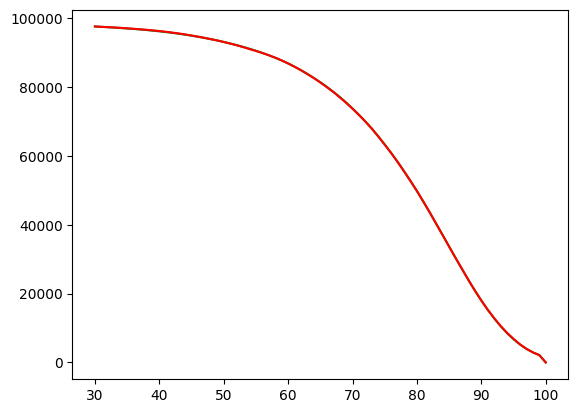

In [5]:
deaths = np.zeros(101, dtype=np.int32)
start = 30
count = 100_000 - curve[start]
for i in range(count):
    yod = pyod(30, 100)
    deaths[yod] += 1
survival = count - np.cumsum(deaths)
plt.plot(range(30, 101), 100_000 - curve[31:], color="green")
plt.plot(range(30, 101), survival[30:], color="red")
plt.show()